<h1 style='color:green'>Customer Segmentation and Product Recommendation</h1>

## Import required Libraries

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

## Load the Dataset

In [2]:
df = pd.read_excel("Online Retail.xlsx")

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


<h2 style = 'color:green')>Initial Data Cleaning</h2>

In [4]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [5]:
df.shape

(541909, 8)

In [6]:
# drop columns with null value

df.dropna(subset=['CustomerID', 'Description'], inplace=True)

In [7]:
#  Remove canceled transactions (InvoiceNo starting with 'C')

df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]

In [8]:
df.duplicated().sum()

np.int64(5192)

In [9]:
df.drop_duplicates(inplace=True)

## Create new Feature

In [10]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392732 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392732 non-null  object        
 1   StockCode    392732 non-null  object        
 2   Description  392732 non-null  object        
 3   Quantity     392732 non-null  int64         
 4   InvoiceDate  392732 non-null  datetime64[ns]
 5   UnitPrice    392732 non-null  float64       
 6   CustomerID   392732 non-null  float64       
 7   Country      392732 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.0+ MB


In [12]:
# create total price column"

df['TotlaPrice'] = df['Quantity'] * df['UnitPrice']

In [13]:
# row, column
df.shape[0], df.shape[1]

(392732, 9)

In [14]:
# unique Customer 
df['CustomerID'].nunique()

4339

In [15]:
# unique product
df['Description'].nunique()

3877

In [16]:
# time range
df['InvoiceDate'].min(), df['InvoiceDate'].max()

(Timestamp('2010-12-01 08:26:00'), Timestamp('2011-12-09 12:50:00'))

In [17]:
# save clean dataset as csv file

df.to_csv('Cleaned_online_retail.csv', index=False)

<h1 style='color:green'>Exploratory Data Analysis (EDA)</h1>

In [18]:
df = pd.read_csv('Cleaned_online_retail.csv')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotlaPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [19]:
df.shape

(392732, 9)

In [20]:
df.isnull().sum().sum()

np.int64(0)

In [21]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392732 entries, 0 to 392731
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392732 non-null  int64         
 1   StockCode    392732 non-null  object        
 2   Description  392732 non-null  object        
 3   Quantity     392732 non-null  int64         
 4   InvoiceDate  392732 non-null  datetime64[ns]
 5   UnitPrice    392732 non-null  float64       
 6   CustomerID   392732 non-null  float64       
 7   Country      392732 non-null  object        
 8   TotlaPrice   392732 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 27.0+ MB


In [23]:
# Set Reference Date for Recency Calculation
import datetime as dt

reference_data = df['InvoiceDate'].max() + pd.Timedelta(days=1)

In [24]:
# Build RFM talbe (per customer)

rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_data - x.max()).days, 
    'InvoiceNo': 'nunique',  
    'TotlaPrice': 'sum'
}).reset_index()

In [25]:
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']
rfm.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,1,77183.60
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,19,1,1757.55
4,12350.0,310,1,334.40


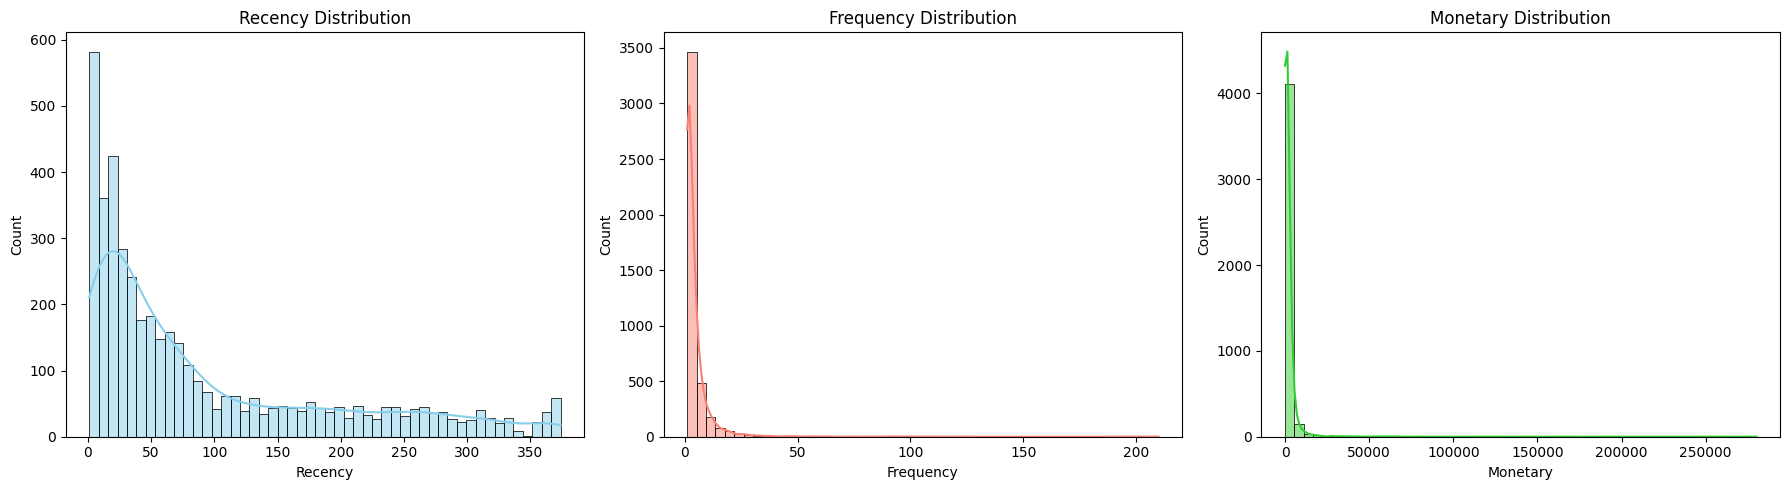

In [26]:
# visualize Distribution of RFM
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(rfm['Recency'], bins=50, kde=True, ax=ax[0], color='skyblue')
ax[0].set_title('Recency Distribution')

sns.histplot(rfm['Frequency'], bins=50, kde=True, ax=ax[1], color='salmon')
ax[1].set_title('Frequency Distribution') 

sns.histplot(rfm['Monetary'], bins=50, kde=True, ax=ax[2], color='limegreen')
ax[2].set_title('Monetary Distribution')

plt.tight_layout()
plt.show()

In [27]:
# handle skewness
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
rfm_scaled = scalar.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

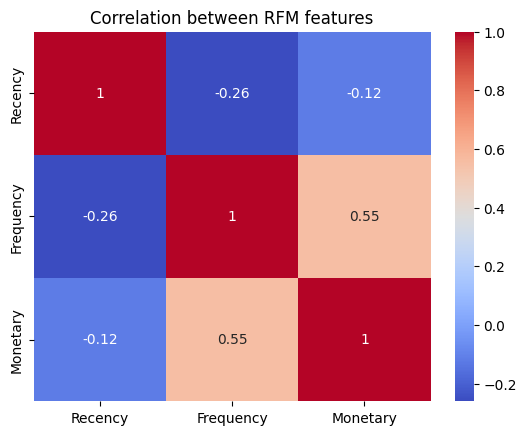

In [28]:
# correlation heatmapabs

sns.heatmap(rfm[['Recency', 'Frequency', 'Monetary']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between RFM features')
plt.show()

In [29]:
rfm.to_csv('rfm_features.csv', index=False)

<h2 style='color:green'>Feature Scaling</h2>

In [30]:
rfm = pd.read_csv('rfm_features.csv')
rfm.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,1,77183.60
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,19,1,1757.55
4,12350.0,310,1,334.40


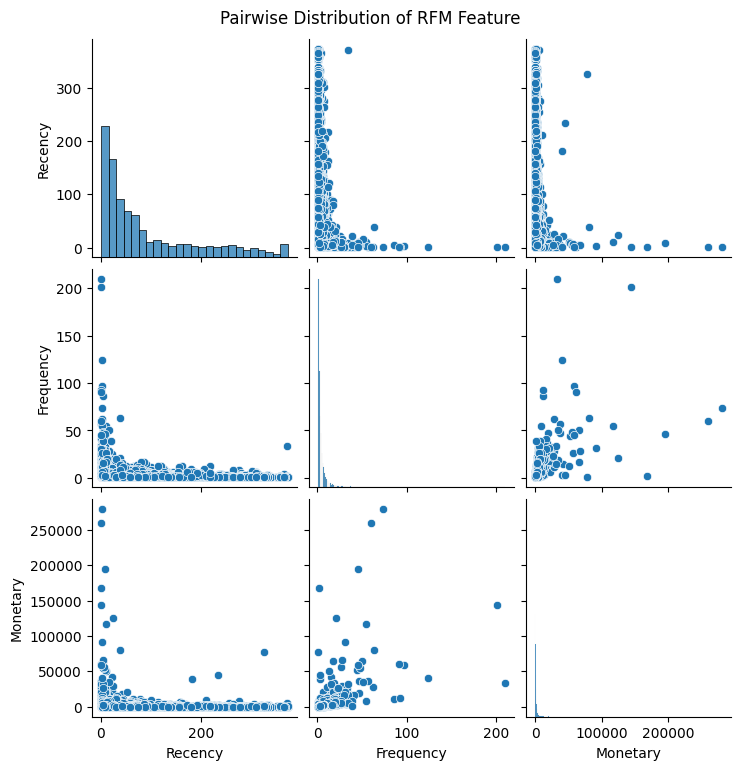

In [31]:
sns.pairplot(rfm.drop(columns = ['CustomerID']))
plt.suptitle('Pairwise Distribution of RFM Feature', y = 1.02)
plt.show()

In [32]:
# Log Transformation (fix skewness)

rfm_log = rfm.copy()
rfm_log['Monetary'] = np.log1p(rfm_log['Monetary'])
rfm_log['Frequency'] = np.log1p(rfm_log['Frequency'])

In [33]:
## Normalize Feature 

scalar = StandardScaler()
rfm_scaled = scalar.fit_transform(rfm_log.drop(columns=['CustomerID']))

In [34]:
rfm_scaled

array([[ 2.33485829, -0.95501313,  3.69768662],
       [-0.90519931,  1.07452296,  1.41181999],
       [-0.17518634,  0.38643726,  0.71904602],
       ...,
       [-0.84519825, -0.36141188, -1.10875557],
       [-0.88519896,  2.1780455 ,  0.8215225 ],
       [-0.49519203,  0.05975492,  0.73649444]])

In [35]:
# Dimensionality Reduction PCA
from sklearn.decomposition import PCA

pca = PCA(n_components= 2)
rfm_pca = pca.fit_transform(rfm_scaled)

In [36]:
rfm_pca_df = pd.DataFrame(data=rfm_pca, columns=['PC1', 'PC2'])
rfm_pca_df.head()

,PC1,PC2
0,0.546908,3.158426
1,1.974910,0.070567
2,0.767384,0.237162
3,0.189835,-0.664549
4,-2.022122,1.379711


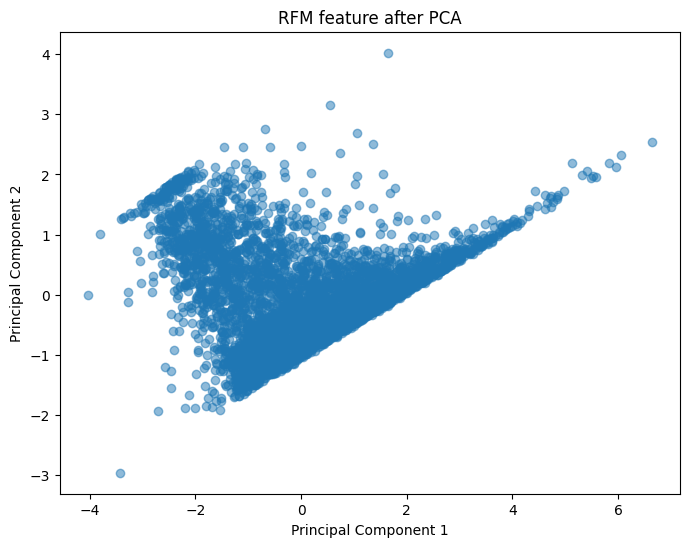

In [37]:
## Visualize PCA output

plt.figure(figsize=(8, 6))
plt.scatter(rfm_pca_df['PC1'], rfm_pca_df['PC2'], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('RFM feature after PCA')
plt.show()

In [38]:
## Save Processed Data 
pd.DataFrame(rfm_scaled, columns=['Recency', 'Frequency', 'Monetary']).to_csv("rfm_scaled.csv", index=False)

rfm_pca_df.to_csv("rfm_pca_2d.csv", index=False)

<h1 style='color:green'>Association Rule Learning (Aprior)</h1>

In [39]:
df = pd.read_csv('Cleaned_online_retail.csv', parse_dates=['InvoiceDate'])
df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotlaPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00


<h2>Create a basket format</h2> 
<p>Each InvoiceNo is a transaction, and each Description is an item. </p>

In [40]:
basket = df.groupby(['InvoiceNo', 'Description'])['Quantity'].sum().unstack().fillna(0)

In [41]:
basket = basket.map(lambda x: 1 if x > 0 else 0)
basket.head()

Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
basket[' 4 PURPLE FLOCK DINNER CANDLES'].value_counts()

 4 PURPLE FLOCK DINNER CANDLES
0    18500
1       36
Name: count, dtype: int64

## Apply apriori Algorithm

In [43]:
from mlxtend.frequent_patterns import apriori, association_rules

In [44]:
frequent_items = apriori(basket, min_support=0.03, use_colnames=True, max_len=2)

/home/sabin/myenv/lib/python3.12/site-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [45]:
rules = association_rules(frequent_items, metric="lift", min_threshold=1)

In [46]:
rules.sort_values(by='lift', ascending=False, inplace=True)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski


## Filter strong rules

In [47]:
strong_rules = rules[
    (rules['confidence'] > 0.3) & 
    (rules['lift'] > 3)
]
strong_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]

,antecedents,consequents,support,confidence,lift


In [49]:
# save rules 
strong_rules.to_csv("apriori_rules.csv", index=False)

<h1 style='color:Green'>Clustering Algorithms </h1>

## K-Means Clustering

In [50]:
import pandas as pd

rfm_scaled = pd.read_csv('rfm_scaled.csv')
rfm_scaled.head(3)

,Recency,Frequency,Monetary
0,2.334858,-0.955013,3.697687
1,-0.905199,1.074523,1.411820
2,-0.175186,0.386437,0.719046


In [51]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [52]:
sse = []
silhouette = []

for k in range(2,11): 
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    sse.append(kmeans.inertia_)
    silhouette.append(silhouette_score(rfm_scaled, kmeans.labels_))

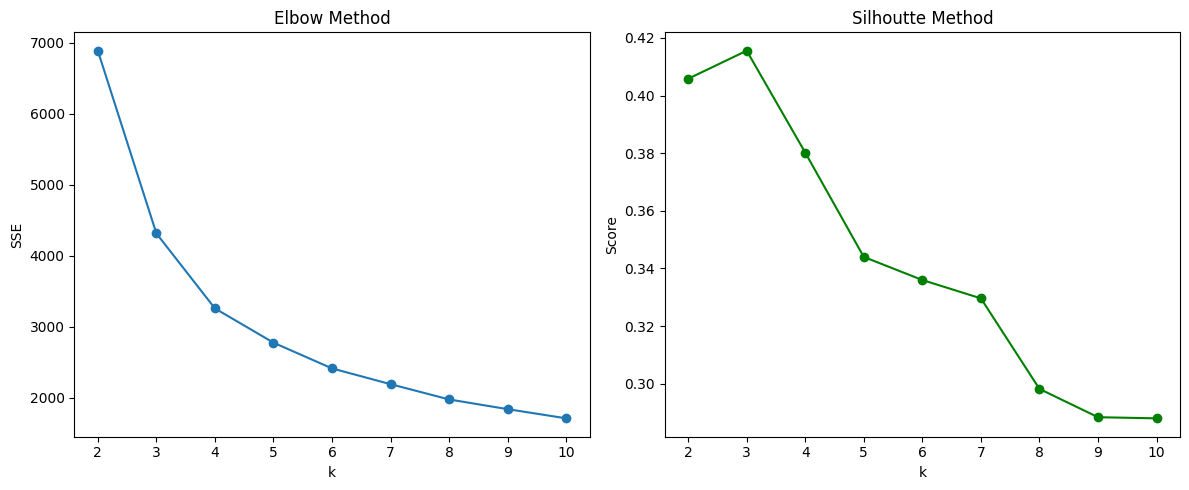

In [53]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(2, 11), sse, marker='o')
plt.title('Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')

plt.subplot(1, 2, 2) 
plt.plot(range(2, 11), silhouette, marker='o', color='green')
plt.title('Silhoutte Method')
plt.xlabel('k')
plt.ylabel('Score')

plt.tight_layout()
plt.show()

In [54]:
kmeans = KMeans(n_clusters=4, random_state=42)
rfm_scaled['Cluster_KMeans'] = kmeans.fit_predict(rfm_scaled)

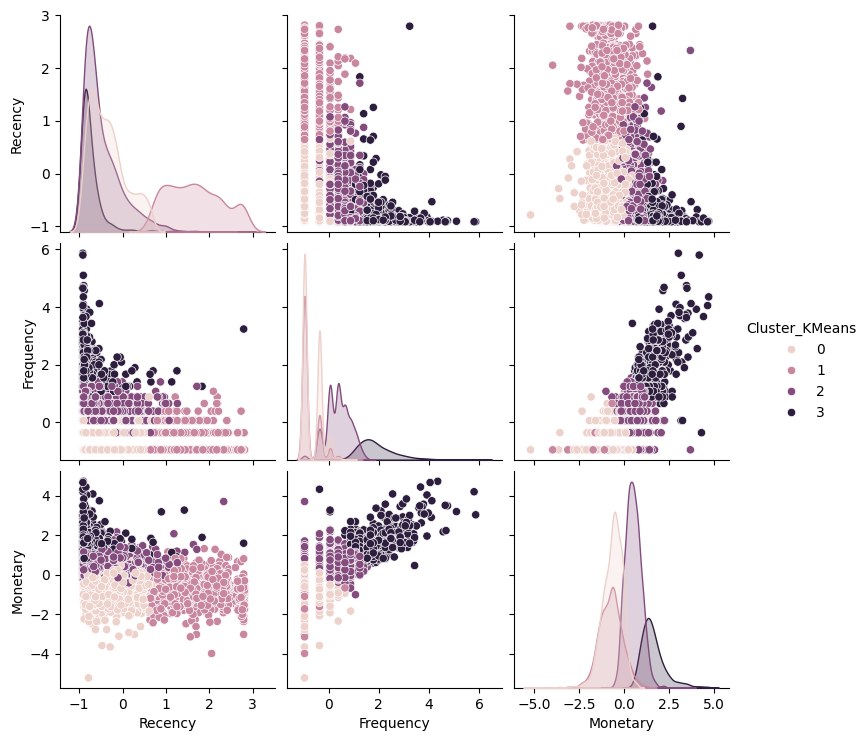

In [55]:
import seaborn as sns 
sns.pairplot(data=rfm_scaled, hue='Cluster_KMeans')
plt.show()

In [56]:
rfm_scaled.head()

,Recency,Frequency,Monetary,Cluster_KMeans
0,2.334858,-0.955013,3.697687,2
1,-0.905199,1.074523,1.411820,3
2,-0.175186,0.386437,0.719046,2
3,-0.735196,-0.955013,0.701362,2
4,2.174855,-0.955013,-0.611449,1


<h2 style='color:green'>Agglomerative (Hierarchical) Clustering</h2>

In [57]:
from sklearn.cluster import AgglomerativeClustering

In [58]:
agg = AgglomerativeClustering(n_clusters=4)

In [59]:
rfm_scaled['Cluster_Agglo'] = agg.fit_predict(rfm_scaled)

<h2 style="color:green">DBSCAN</h2>

In [60]:
from sklearn.cluster import DBSCAN

In [61]:
db = DBSCAN(eps=0.8, min_samples=5)
rfm_scaled['Cluster_DBSCAN'] = db.fit_predict(rfm_scaled)

<h2 style="color:green">MeanShift</h2>

In [62]:
from sklearn.cluster import MeanShift

ms = MeanShift()
rfm_scaled['Cluster_MeanShift'] = ms.fit_predict(rfm_scaled)

<h2 style="color:green">Gaussian Mixture Model (GMM)</h2>

In [63]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=4, random_state=42)
rfm_scaled['Cluster_GMM'] = gmm.fit_predict(rfm_scaled)

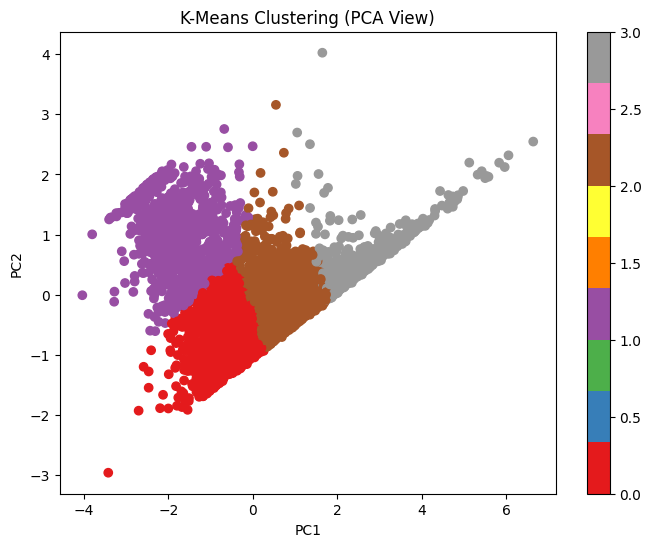

In [64]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
pca_components = pca.fit_transform(rfm_scaled.drop(columns=[
    'Cluster_KMeans', 'Cluster_Agglo', 'Cluster_DBSCAN', 'Cluster_MeanShift', 'Cluster_GMM'
]))

pca_df = pd.DataFrame(pca_components, columns=['PC1', 'PC2'])
pca_df['KMeans'] = rfm_scaled['Cluster_KMeans']

plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['KMeans'], cmap='Set1')
plt.title("K-Means Clustering (PCA View)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar()
plt.show()

<h2 style='color:green'>Save Clustered Data</h2>

In [65]:
rfm_scaled.to_csv("rfm_clusters_all.csv", index=False)